<a href="https://colab.research.google.com/github/sanjanb/Machine-Learning-basics/blob/main/PyTorch_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction to PyTorch**
Simple Operations


In [ ]:
import torch

# Tensor creation
scalar = torch.tensor(7)
vector = torch.tensor([1,2,3])
matrix = torch.tensor([[1,2,3],[4,5,6]])
tensor = torch.rand((3,3))

print("Scalar:", scalar)
print("Vector:", vector)
print("Matrix:", matrix)
print("Tensor:", tensor)

# Tensor operation
a = torch.tensor([[1,2],[3,4]])
b = torch.tensor([[5,6],[7,8]])
print("Addition:\n",a+b)
print("Matrix multiplitcation:\n", torch.matmul(a,b))

# Tensor attributes
print("shape:",tensor.shape)
print("Data type:", tensor.dtype)



Scalar: tensor(7)
Vector: tensor([1, 2, 3])
Matrix: tensor([[1, 2, 3],
        [4, 5, 6]])
Tensor: tensor([[0.6386, 0.7066, 0.4180],
        [0.7298, 0.5886, 0.6030],
        [0.3459, 0.4578, 0.5577]])
Addition:
 tensor([[ 6,  8],
        [10, 12]])
Matrix multiplitcation:
 tensor([[19, 22],
        [43, 50]])
shape: torch.Size([3, 3])
Data type: torch.float32


# **Pytorch Autograd**
### Automatic differenciation

In [ ]:
x = torch.tensor(2.0, requires_grad=True)
y = x**3+2*x**2+1

# Compute gradients
y.backward()
print("Gradient of y with respect to x:", x.grad)

# Gradient accumulation
x = torch.tensor([1.0, 2.0, 3.0], requires_grad = True)
y = x**2 + 3
z = y.sum()
z.backward()
print("Gradients:", x.grad)

Gradient of y with respect to x: tensor(20.)
Gradients: tensor([2., 4., 6.])


epoch 9, Loss: 41.618690490722656
epoch 19, Loss: 24.879350662231445
epoch 29, Loss: 14.881577491760254
epoch 39, Loss: 8.910099029541016
epoch 49, Loss: 5.343263626098633
epoch 59, Loss: 3.212573766708374
epoch 69, Loss: 1.9396060705184937
epoch 79, Loss: 1.1789110898971558
epoch 89, Loss: 0.7241750359535217
epoch 99, Loss: 0.4521758258342743


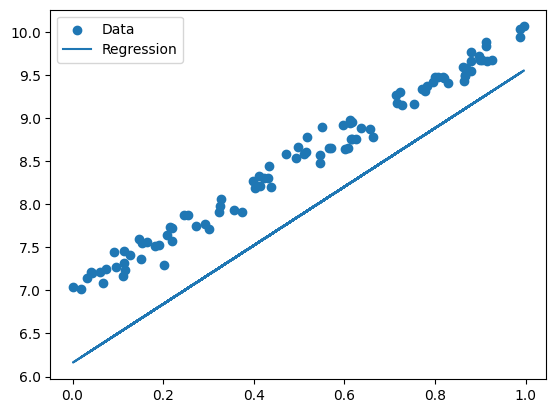

In [11]:
from os import pread
# Building and training a regression model
import numpy as np
import torch

# Generate synthetic data
x = np.random.rand(100,1).astype(np.float32)
# Convert data to PyTorch tensors before using it in the equation below.
X = torch.from_numpy(x)
# Calculate y using X, which is now a PyTorch tensor.
y = 3* X + 7 + torch.from_numpy(np.random.normal(0, 0.1, (100, 1)).astype(np.float32))
Y = y

# Define a linear regression model
class LinearRegression(torch.nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.linear = torch.nn.Linear(1,1)

    def forward(self, x):
        return self.linear(x)

model = LinearRegression()

# Define loss and optimizer
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# Training loop
epochs = 100
for epoch in range(epochs):
  # Forward pass
  predictions = model(X)
  loss = criterion(predictions, Y)

  # Backward pass and optimization
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  if (epoch+1) % 10 == 0:
    print(f"epoch {epoch}, Loss: {loss.item()}")

# Plot results
import matplotlib.pyplot as plt
with torch.no_grad():
  plt.scatter(x, y.numpy(), label='Data')
  plt.plot(x, model(X).detach().numpy(), label='Regression')
  plt.legend()
  plt.show()